In [1]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt

In [2]:
def euler(t, K):
    h = (b - a) / K
    x = np.zeros(K + 1)
    x[0] = x0
    for i in range(K):
        x[i + 1] = x[i] + f(t[i], x[i]) * h
    return x

In [3]:
def RK_2(t, K, alpha = 3. / 4.):
    h = (b - a) / K
    x = np.zeros(K + 1)
    x[0] = x0
    for i in range(K):
        k1 = f(t[i], x[i])
        k2 = f(t[i] + h / (2 * alpha), x[i] + k1 * h / (2 * alpha))
        x[i + 1] = x[i] + h * ((1 - alpha) * k1 + alpha * k2)
    return x

In [4]:
def RK_4(t, K):
    h = (b - a) / K
    x = np.zeros(K + 1)
    x[0] = x0
    for i in range(K):
        k1 = f(t[i], x[i])
        k2 = f(t[i] + h / 2, x[i] + k1 * h / 2)
        k3 = f(t[i] + h / 2, x[i] + k2 * h / 2)
        k4 = f(t[i] + h, x[i] + k3 * h)
        x[i + 1] = x[i] + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
    return x

In [5]:
def error(x_true, x, K):
    error = max(abs(x_true - x))
    return error

In [6]:
# параметры диф. ур-ия
f = lambda t, x: -x
a, b = 0., 3.
x0 = 1.

In [7]:
# точное решение
f0 = lambda t: np.exp(-t)
M = 100

In [8]:
labels = ['Euler', 'Runge-Kutta 2nd order', 'Runge-Kutta 4th order']

-----------

In [12]:
K0 = 5
t = linspace(a, b, K0 + 1)
solutions = [euler(t, K0), RK_2(t, K0), RK_4(t, K0)]

In [13]:
t_ex = np.linspace(a, b, M)
x_ex = np.array([f0(s) for s in t_ex])

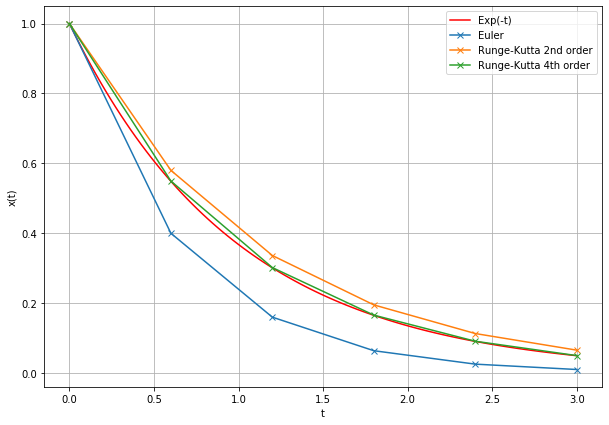

In [14]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 1, 1)
plt.plot(t_ex, x_ex, 'r', label='Exp(-t)')

for i in range(3):
    plt.plot(t, solutions[i], '-x', label=labels[i])

plt.legend(loc=1)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

In [15]:
MAX = 12
num_iter = 2 ** np.arange(2, MAX)
i = 0
errors = [np.zeros(MAX - 2) for j in range(3)]
for n in num_iter:
    t = linspace(a, b, n + 1)
    exp = np.array([f0(s) for s in t])
    sol_n = [euler(t, n), RK_2(t, n), RK_4(t, n)]
    for j in range(3):
        errors[j][i] = error(exp, sol_n[j], n)
    i += 1

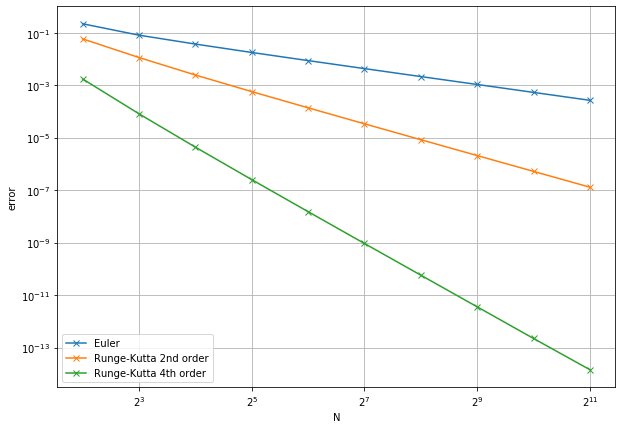

In [16]:
plt.figure(figsize=(10, 7))
plt.subplot(1, 1, 1)

for i in range(3):
    plt.loglog(num_iter, errors[i], '-x', label=labels[i])

plt.legend(loc=3)
plt.xscale('log', basex=2)
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('error')
plt.grid()
plt.show()